In [69]:
""" Problem 3 Part 1
Written following pseudocode provided in handout """
def pegasos(data, lamb, max_epochs):
    X, Y = data
    n, m = len(X), len(X[0])
    t, W, W_0 = 0, pl.zeros(m), 0
    for epoch in range(max_epochs):
        for i in range(n):
            t = t + 1
            eta = 1. / (t * lamb)
            if (Y[i] * (pl.dot(W, X[i]) + W_0) < 1).any():
                W = (1 - eta * lamb) * W + eta * Y[i] * X[i]
                W_0 = W_0 + eta * Y[i]
            else:
                W = (1 - eta * lamb) * W
    return W, W_0

2 [-0.0343527   0.46056634] [-0.06796142]


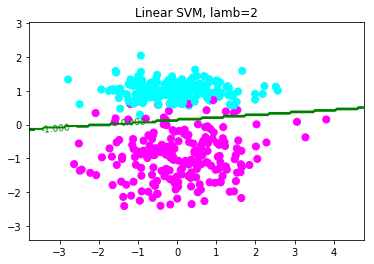

1 [-0.04589785  0.69670063] [ 0.11166086]


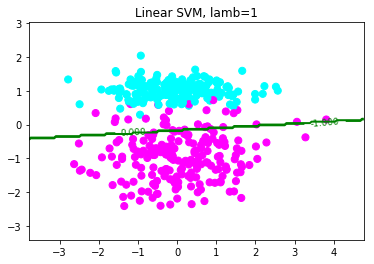

0.5 [-0.02985168  0.87778769] [ 0.02719398]


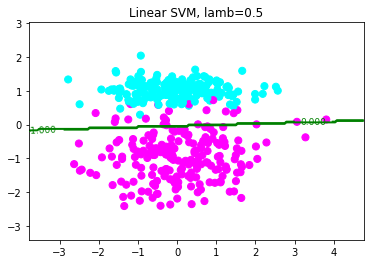

0.25 [-0.05013861  1.07056492] [-0.06617766]


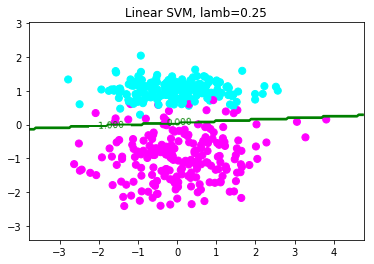

0.125 [-0.06434162  1.27303955] [-0.15304205]


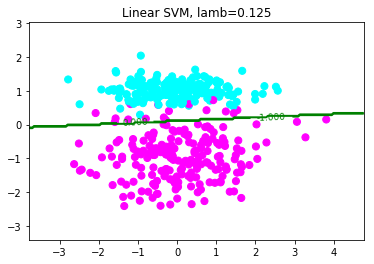

0.0625 [-0.06129728  1.4880598 ] [-0.2349135]


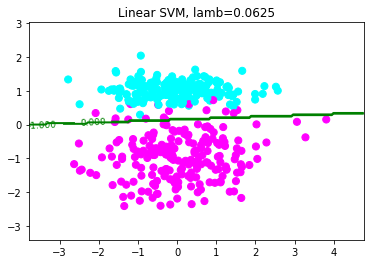

0.03125 [-0.12557687  1.77276123] [-0.3774444]


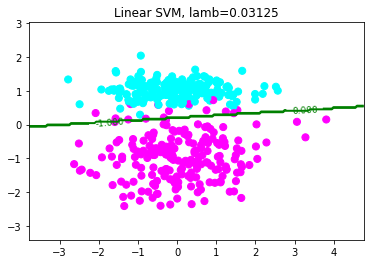

0.015625 [-0.15321632  2.12855836] [-0.59404525]


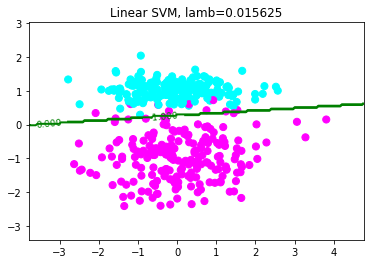

0.0078125 [-0.14305073  2.38910742] [-0.74942171]


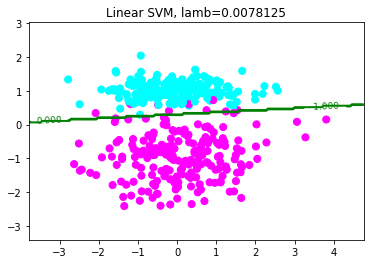

0.00390625 [-0.08485313  2.96607479] [-1.05145348]


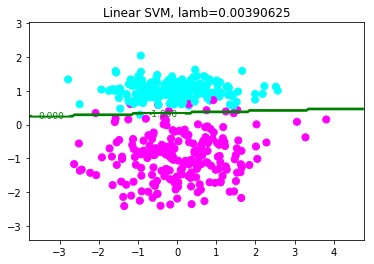

0.001953125 [-0.11566481  3.75610994] [-1.50112179]


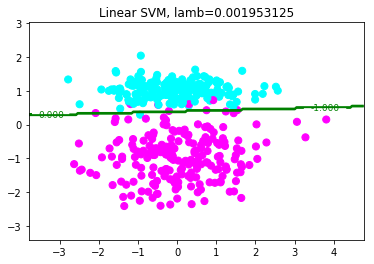

0.0009765625 [-0.1202367   4.45843684] [-1.87673679]


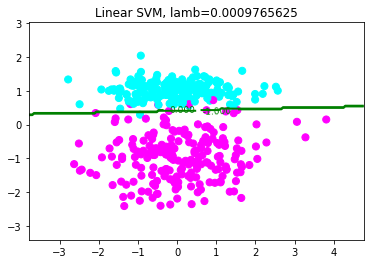

In [85]:
""" Problem 3 Part 2
Copied from pegasos_linear_test.py """

from numpy import *
from plotBoundary import *
import pylab as pl

# load data from csv files
train = loadtxt('data/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]

# Carry out training.

max_epochs = 200
for lamb in [2 ** i for i in range(1, -11, -1)]:
    W, W_0 = pegasos((X, Y), lamb, max_epochs)

    def predict_linearSVM(x): # x should be 1x1
        def sign(z):
            return 1 if (z > 0).any() else -1
        return sign(pl.dot(W, x) + W_0)


    print(lamb, W, W_0)
    # plot training results
    plotDecisionBoundary(X, Y, predict_linearSVM, [-1,0,1], title = 'Linear SVM, lamb=%s' % lamb)
    pl.show()



In [83]:
""" Problem 3 Part 3
Written following pseudocode provided in handout """
def pegasos_kernelized(X, Y, K, lamb, max_epochs):
    n = len(X)
    t, a = 0, pl.zeros(n)
    for epoch in range(max_epochs):
        for i in range(n):
            t = t + 1
            eta = 1. / (t * lamb)
            if (Y[i] * sum(a[j] * K[j][i] for j in range(n)) < 1).any():
                a[i] = (1 - eta * lamb) * a[i] + eta * Y[i]
            else:
                a[i] = (1 - eta * lamb) * a[i]
    return a

train_gaussianSVM = pegasos_kernelized


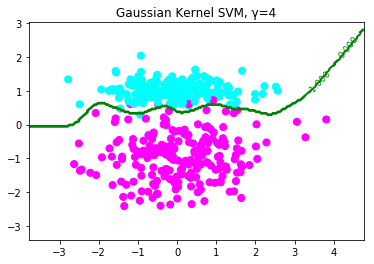

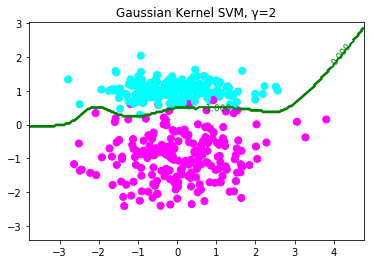

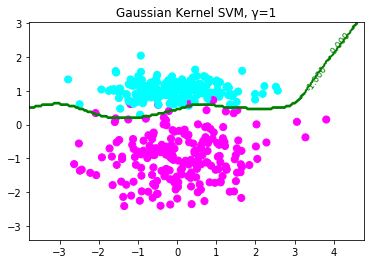

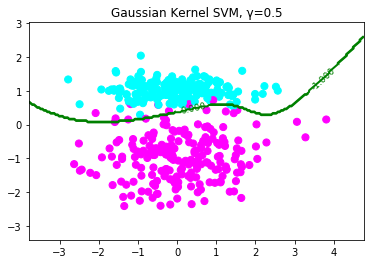

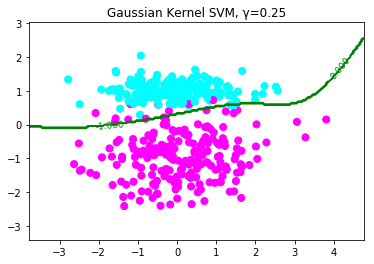

In [109]:
""" Problem 3 Part 4
Copied from pegasos_gaussian_test.py """

from numpy import *
from plotBoundary import *
import pylab as pl
# import your LR training code

# load data from csv files
train = loadtxt('data/data3_train.csv')
X = train[:,0:2]
Y = train[:,2:3]

# Carry out training.
epochs = 1000
lmbda = .02

for gamma in [2**2, 2**1, 2**0, 2**-1, 2**-2]:
    n = len(X)

    K = zeros((n,n));
    def kernel_func(x, x_p):
        return pl.exp(-gamma * pl.norm(x - x_p)**2)

    for i in range(n):
        for j in range(n):
            K[i][j] = kernel_func(X[i], X[j])

    a = train_gaussianSVM(X, Y, K, lmbda, epochs);

    def predict_gaussianSVM(x):
        def sign(z):
            return 1 if (z > 0).any() else -1
        return sign(sum(a[j] * kernel_func(X[j], x) for j in range(n)))


    # plot training results
    plotDecisionBoundary(X, Y, predict_gaussianSVM, [-1,0,1], title = 'Gaussian Kernel SVM, γ=%s' % gamma)
    pl.show()
